In [1]:
%load_ext watermark
%watermark

2020-09-10T16:47:52-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

import pandas as pd
import numpy as np
from sklearn import datasets

Utilizaremos el dataset de Winsconsin Breast Cancer Dataset, que es un dataset de imagenes de celulas de personas con posible cancer de mamá

In [3]:
cancer_datos = datasets.load_breast_cancer()
cancer_datos.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer_datos["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
cancer_datos["target"][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [8]:
cancer_datos["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [9]:
cancer_df = pd.DataFrame(cancer_datos["data"],columns=cancer_datos["feature_names"])

cancer_df["objetivo"] = cancer_datos["target"]

In [11]:
cancer_df.shape

(569, 31)

In [12]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
cancer_df.objetivo.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: objetivo, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
train_df, test_df = train_test_split(cancer_df, test_size=0.4)

In [16]:
variables_entrenamiento = cancer_datos["feature_names"]
variables_objetivo = "objetivo"

Text(0, 0.5, 'Diagnostico (Maligno|Benigno)')

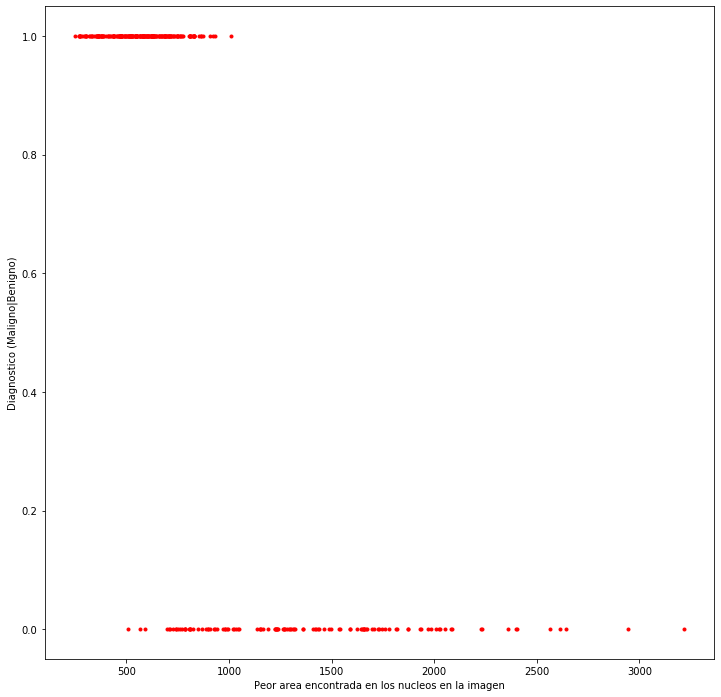

In [17]:
columna_entrenamiento = "worst area"

plt.plot(train_df[columna_entrenamiento], train_df["objetivo"], '.r')
plt.xlabel("Peor area encontrada en los nucleos en la imagen")
plt.ylabel("Diagnostico (Maligno|Benigno)")

Cuanto  mayor sea la peor area mayor es la posibilidad de que sea un tumor maligno

In [20]:
modelo_ols = LinearRegression()
modelo_ols.fit(X=train_df[[columna_entrenamiento]],y=train_df[variables_objetivo])

predicciones = modelo_ols.predict(test_df[[columna_entrenamiento]])
predicciones[:10]

array([ 0.77475226, -0.03042296,  0.87815021, -0.00619988,  0.26509863,
        0.90777158, -0.10793682,  0.75675797,  0.73412669,  0.79343864])

Text(0, 0.5, 'Diagnostico (Maligno|Benigno)')

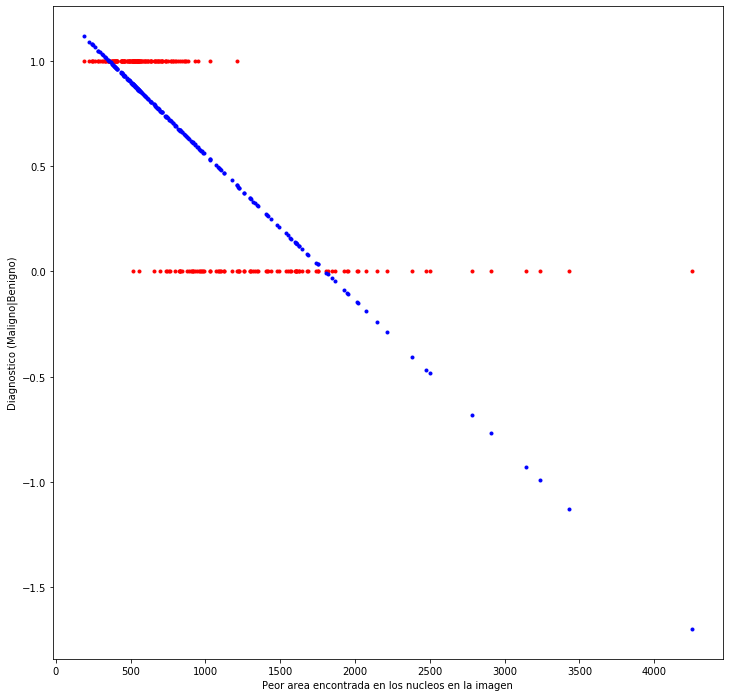

In [21]:
plt.plot(test_df[columna_entrenamiento], test_df["objetivo"], '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.xlabel("Peor area encontrada en los nucleos en la imagen")
plt.ylabel("Diagnostico (Maligno|Benigno)")

Otra forma de la función logistica

$$f(x)=\dfrac{L}{1+e^{-k(x-x_0)}}$$

$L \rightarrow$ define el valor maximo en el eje de las $y$

$k \rightarrow$ Mide la inclinación de la función

$x_0 \rightarrow$ Mide la simetria de la función

In [22]:
from ipywidgets import interact

def funcion_logistica(x,L=1,k=1,x0=0):
    return L / (1+np.exp(-k*(x-x0)))

@interact(L=range(1,10), k=range(-5,5), x0=range(0,10))
def plot_funcion_logit(L,k,x0):
    x=np.linspace(-5*k,5*k,500)
    y=funcion_logistica(x,k=k,L=L,x0=x0)
    plt.figure(1)
    plt.plot(x,y)
    plt.show()

interactive(children=(Dropdown(description='L', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [23]:
predicciones_probabilidades = list(map(funcion_logistica, predicciones))

Text(0, 0.5, 'Diagnostico (Maligno|Benigno)')

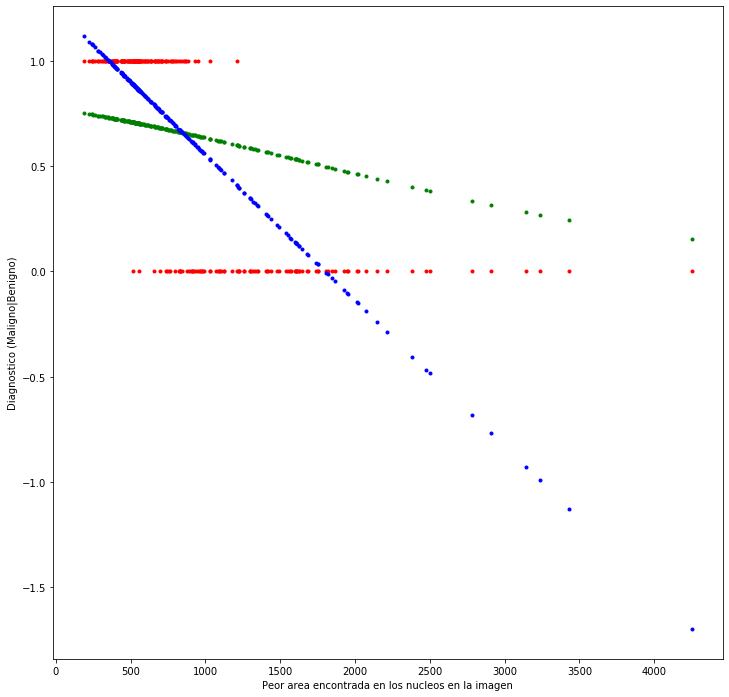

In [26]:
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades, '.g')
plt.plot(test_df[columna_entrenamiento], test_df["objetivo"], '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.xlabel("Peor area encontrada en los nucleos en la imagen")
plt.ylabel("Diagnostico (Maligno|Benigno)")

Text(0, 0.5, 'Diagnostico (Maligno|Benigno)')

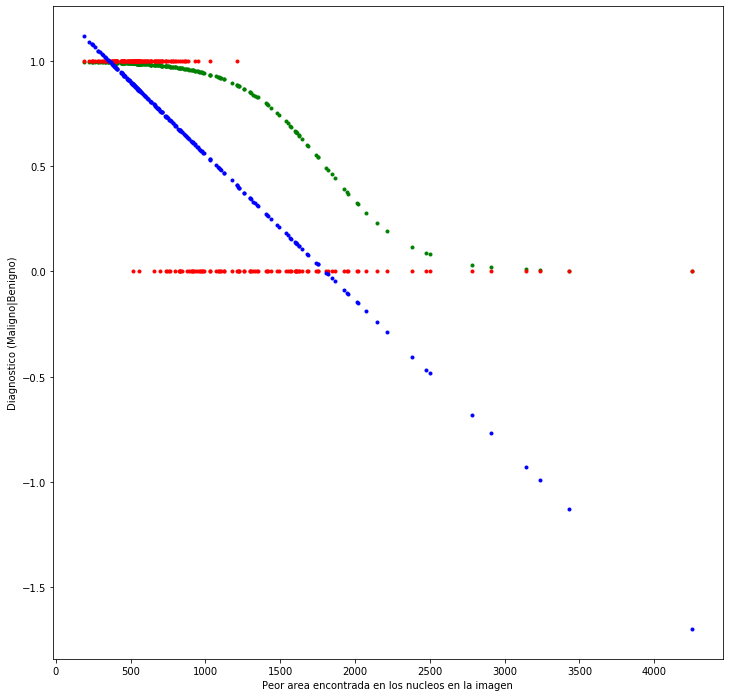

In [27]:
from functools import partial

funcion_logit_k5 = partial(funcion_logistica,k=5)

predicciones_probabilidades = list(map(funcion_logit_k5, predicciones))

plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades, '.g')
plt.plot(test_df[columna_entrenamiento], test_df["objetivo"], '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.xlabel("Peor area encontrada en los nucleos en la imagen")
plt.ylabel("Diagnostico (Maligno|Benigno)")

In [28]:
from sklearn.linear_model import LogisticRegression

In [33]:
LogisticRegression?

In [31]:
X = cancer_df[variables_entrenamiento]
y = cancer_df[variables_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [34]:
clf = LogisticRegression(max_iter=5000, tol=0.01)
clf.fit(X_train,y_train)
predicciones = clf.predict(X_test)

predicciones[:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

Esta predicción solo nos entrega las etiquetas, si queremos obtener la probabilidad

In [35]:
predicciones_probabilidades = clf.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[2.14906191e-04, 9.99785094e-01],
       [5.86026786e-01, 4.13973214e-01],
       [9.99728055e-01, 2.71945470e-04],
       [3.28991069e-01, 6.71008931e-01],
       [7.69706288e-01, 2.30293712e-01],
       [6.15111108e-07, 9.99999385e-01],
       [5.99391075e-03, 9.94006089e-01],
       [4.69690469e-01, 5.30309531e-01],
       [1.79935592e-04, 9.99820064e-01],
       [1.25812778e-04, 9.99874187e-01]])

([array([65.,  4.,  5.,  1.,  1.,  2.,  1.,  1.,  1., 33.]),
  array([33.,  1.,  1.,  1.,  2.,  1.,  1.,  5.,  4., 65.])],
 array([3.18400332e-25, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 2 Lists of Patches objects>)

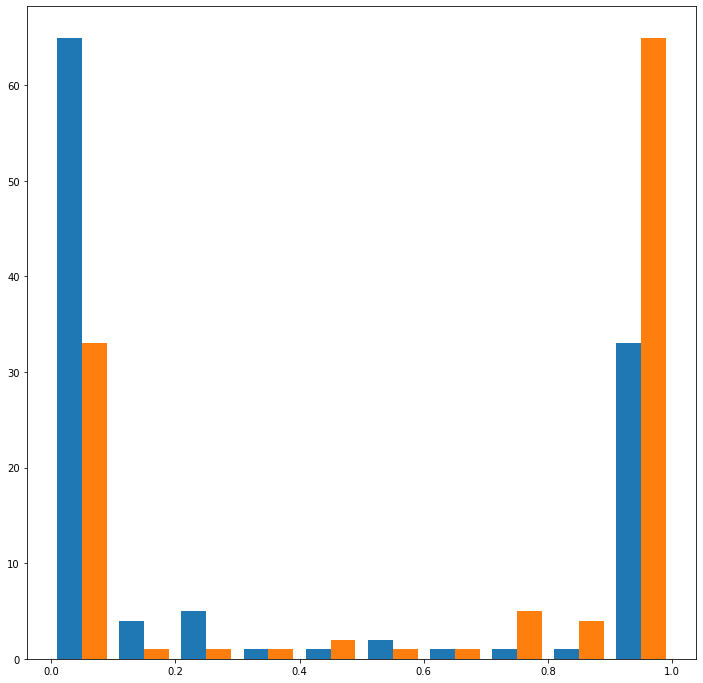

In [36]:
plt.hist(predicciones_probabilidades)

In [37]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [40]:
X = X_test.reset_index().copy()
X["objetivo"] = y_test.to_numpy()
X["prediccion"] = predicciones
X = pd.concat([X,probs_df],axis=1)
X[["objetivo", "prediccion",0,1]].head(20)

,objetivo,prediccion,0,1
0,1,1,2.149062e-04,9.997851e-01
1,1,0,5.860268e-01,4.139732e-01
2,0,0,9.997281e-01,2.719455e-04
3,1,1,3.289911e-01,6.710089e-01
4,1,0,7.697063e-01,2.302937e-01
5,1,1,6.151111e-07,9.999994e-01
6,1,1,5.993911e-03,9.940061e-01
7,0,1,4.696905e-01,5.303095e-01
8,1,1,1.799356e-04,9.998201e-01
9,1,1,1.258128e-04,9.998742e-01


Podemos cambiar los umbrales de probabilidad para que los datos en los que no estamos seguros nos marque un prediccion